# 5. Análises do mercado financeiro

## 5.1. Que análises são essas?

Agora que já entendemos os aspectos principais dos dados de mercado financeiro, e já conseguimos utilizar diversas bibliotecas para obter dados de mercado financeiro, chegou a hora de fazer algumas análises básicas.

Utilizando ferramentas de dados e de visualização, conseguimos explorar os dados para obter insights. Com isso, vamos mostrar alguns exemplos da aplicação do Python no mercado financeiro.

Realizando uma análise exploratória dos dados, vamos calcular métricas importantes no mercado financeiro, como retorno, volatilidade, drawdown, distribuições, skewness, dentre outras.


## 5.2. Obtenção dos dados

Utilizando a biblioteca yfinance, vamos obter os dados de negociação para algum papel, como por exemplo PETR4

In [ ]:
!pip install yfinance 

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pode obter outros ativos que quiser, como ações, FIIs, ETFs, BDRs, etc.

In [36]:
petro = yf.download("PETR4.SA", start="2017-01-01", end="2022-06-09")

[*********************100%***********************]  1 of 1 completed


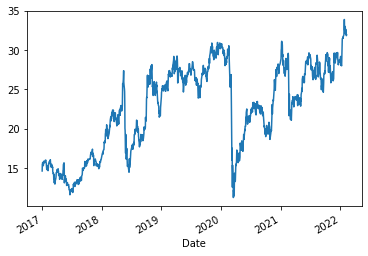

In [5]:
petro.Close.plot();

Pode ser de fundo tambem:

In [35]:
hctr11 = yf.download("hctr11.SA", start="2017-01-01", end="2022-06-09")

[*********************100%***********************]  1 of 1 completed


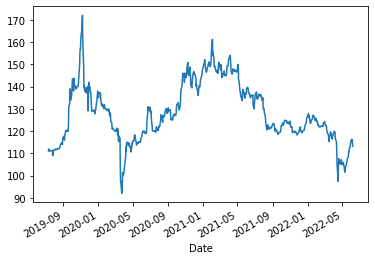

In [14]:
hctr11.Close.plot()

In [15]:
hctr11.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-02,114.889999,115.779999,114.690002,115.699997,115.699997,76916
2022-06-03,115.860001,116.709999,115.820000,116.300003,116.300003,75897
2022-06-06,116.500000,116.750000,116.059998,116.230003,116.230003,67405
2022-06-07,116.300003,116.400002,114.699997,114.949997,114.949997,77336
2022-06-08,113.199997,113.919998,111.260002,113.250000,113.250000,79261


In [21]:
#calculando a variança movel padrão dos ultimos 5 dias
hctr11.Close.rolling(5).var()

Date
2019-07-11         NaN
2019-07-12         NaN
2019-07-15         NaN
2019-07-16         NaN
2019-07-17    0.141585
                ...   
2022-06-02    1.718723
2022-06-03    1.726168
2022-06-06    0.779973
2022-06-07    0.470434
2022-06-08    1.587233
Name: Close, Length: 723, dtype: float64

## 5.3. Médias móveis

### 5.3.1. O que são médias móveis?

Porque elas são tão importantes no mercado financeiro?

Algumas métricas com as quais podemos criar médias móveis: preço, retorno, volatilidade, drawdown


### 5.3.2. Médias móveis do preço

In [37]:
petro.Close.head(10)

Date
2017-01-02    14.66
2017-01-03    15.50
2017-01-04    15.50
2017-01-05    15.75
2017-01-06    15.66
2017-01-09    15.33
2017-01-10    15.48
2017-01-11    15.66
2017-01-12    15.90
2017-01-13    15.68
Name: Close, dtype: float64

In [38]:
#periodo para janela para preencher com a media moveis 
petro.Close.rolling(5).mean()

Date
2017-01-02       NaN
2017-01-03       NaN
2017-01-04       NaN
2017-01-05       NaN
2017-01-06    15.414
               ...  
2022-06-02    30.086
2022-06-03    30.022
2022-06-06    30.084
2022-06-07    30.204
2022-06-08    30.302
Name: Close, Length: 1352, dtype: float64

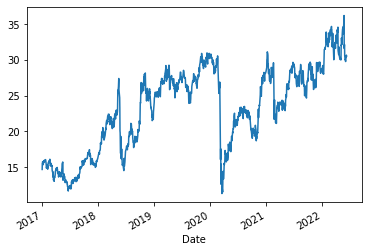

In [39]:
petro.Close.plot()

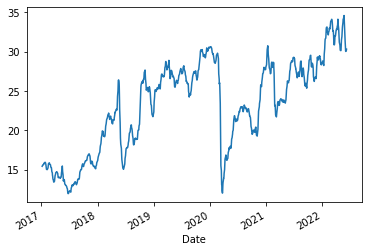

In [40]:
petro.Close.rolling(5).mean().plot()

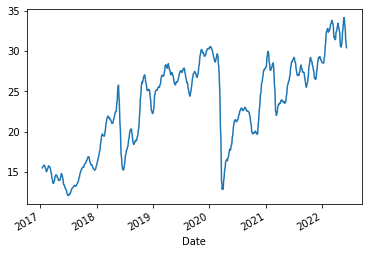

In [41]:
#10 dias 
petro.Close.rolling(10).mean().plot()

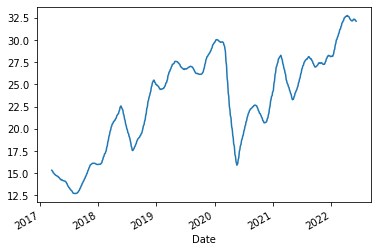

In [42]:
petro.Close.rolling(50).mean().plot()

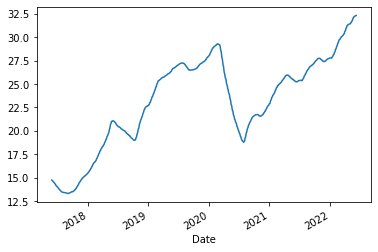

In [43]:
# 100 periodos 
petro.Close.rolling(100).mean().plot()

## 5.4. Retornos diários

In [44]:
petro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,14.64,14.70,14.60,14.66,9.067221,7525700
2017-01-03,14.95,15.65,14.95,15.50,9.586760,39947800
2017-01-04,15.45,15.68,15.31,15.50,9.586760,37071700
2017-01-05,15.70,15.91,15.62,15.75,9.741385,47586300
2017-01-06,15.78,15.92,15.50,15.66,9.685721,25592000


Calculando os retornos diários

In [45]:
#retorno de uma linha para Outro dia
#panda series
petro['Adj Close'].pct_change()

Date
2017-01-02         NaN
2017-01-03    0.057299
2017-01-04    0.000000
2017-01-05    0.016129
2017-01-06   -0.005714
                ...   
2022-06-02   -0.008661
2022-06-03    0.017473
2022-06-06    0.000660
2022-06-07    0.011881
2022-06-08   -0.004892
Name: Adj Close, Length: 1352, dtype: float64

In [46]:
retornos = pd.DataFrame(petro['Adj Close'].pct_change())
retornos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,0.057299
2017-01-04,0.000000
2017-01-05,0.016129
2017-01-06,-0.005714
...,...
2022-06-02,-0.008661
2022-06-03,0.017473
2022-06-06,0.000660


Gráfico dos retornos diários

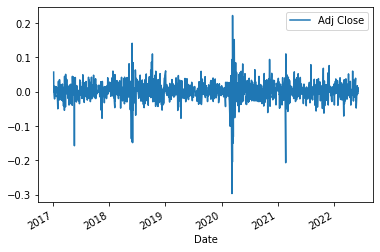

In [47]:
retornos.plot()

Retorno diário médio

In [51]:
retornos.mean()

Adj Close    0.001346
dtype: float64

Média móvel dos retornos

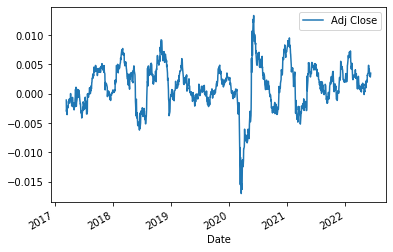

In [52]:
retornos.rolling(50).mean().plot()

## 5.5. Volatilidade

A medida mais básica de volatilidade que podemos ter é o desvio padrão

Calculando o desvio padrão dos retornos diários

In [57]:
#desvio padrão medida de dispersão em torno da Média
#quando o preco do ativo desvia da média
retornos.std()

Adj Close    0.02948
dtype: float64

Portanto, essa é a volatilidade de PETR4 no período

Se quiséssemos visualizar a volatilidade em janelas de tempo, isto é, o comportamento da volatilidade de PETR4 ao longo de períodos específicos de tempo, por exemplo, 10 dias?

In [58]:
janelas_vol = retornos.rolling(10).std()

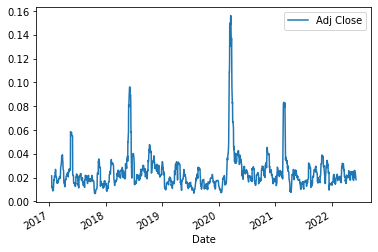

In [59]:
janelas_vol.plot()

## 5.6. Métricas estatísticas

In [60]:
retornos.describe()

,Adj Close
count,1351.000000
mean,0.001346
std,0.029480
min,-0.296978
25%,-0.012071
50%,0.001123
75%,0.014878
max,0.222222


## 5.7. Distribuição dos retornos

Forma de entender onde os retornos se "concentram" com o tempo

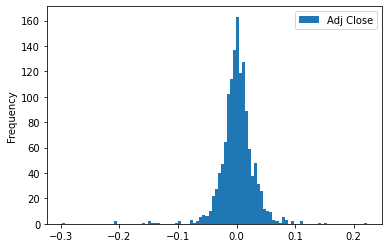

In [65]:
retornos.plot.hist(bins = 100);

## 5.8. Drawdown em janela de 30 dias

Perda máxima em um determinado período - distância entre ganho máximo e a mínima

In [68]:
dd_30 = retornos.rolling(30).min()

In [69]:
dd_30

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
...,...
2022-06-02,-0.047619
2022-06-03,-0.047619
2022-06-06,-0.047619


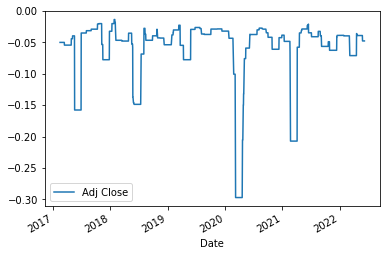

In [67]:
dd_30.plot();

In [70]:
dd_30_max = retornos.rolling(30).max()

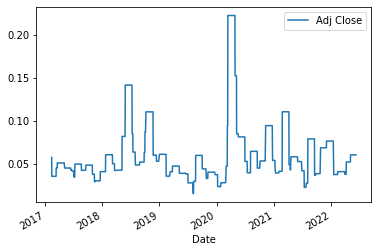

In [71]:
dd_30_max.plot();

## 5.9. Métricas de retorno acumulado

In [72]:
# Calculando o retorno acumulado
ret_acum = (retornos + 1).cumprod()
ret_acum

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.068213
...,...
2022-06-02,3.282152
2022-06-03,3.339502
2022-06-06,3.341707


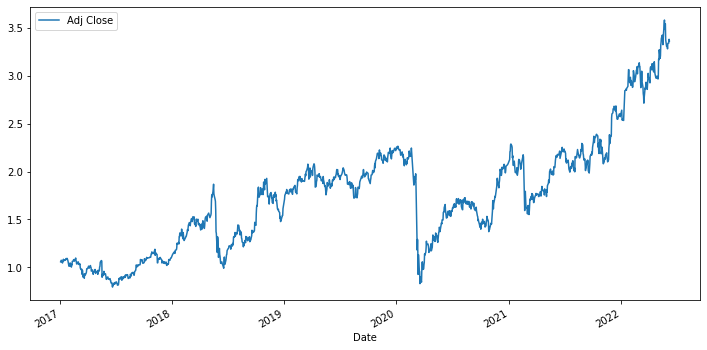

In [73]:
ret_acum.plot(figsize = (12,6))

In [74]:
# Vamos calcular agora o cumulativo máximo, ou seja, os picos atingidos ao longo do tempo
picos = ret_acum.cummax()
picos

,Adj Close
Date,
2017-01-02,NaN
2017-01-03,1.057299
2017-01-04,1.057299
2017-01-05,1.074352
2017-01-06,1.074352
...,...
2022-06-02,3.582632
2022-06-03,3.582632
2022-06-06,3.582632


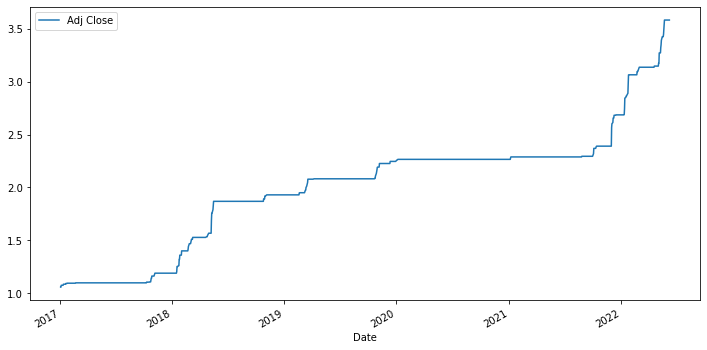

In [75]:
picos.plot(figsize = (12,6))

#### Drawdown

Forma alternativa de cálculo do drawdown, considerando a diferença entre o retorno acumulado e os picos.

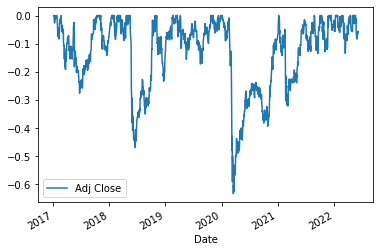

In [76]:
drawdown = (ret_acum - picos)/picos
drawdown.plot()

Qual o drawdown máximo? É justamente o valor mais 'fundo' que o gráfico acima atinge

In [77]:
max_ddw = drawdown.min()

In [78]:
max_ddw*100

Adj Close   -63.356047
dtype: float64

In [79]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown

In [80]:
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.057299,1.057299,1.057299,0.000000
2017-01-04,0.000000,1.057299,1.057299,0.000000
2017-01-05,0.016129,1.074352,1.074352,0.000000
2017-01-06,-0.005714,1.068213,1.074352,-0.005714


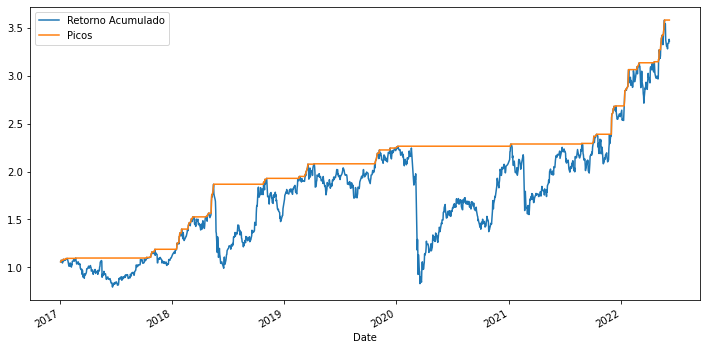

In [83]:
retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (12,6))

## 5.10. Normalização

Para explicar o conceito de normalização, vamos obter dados de vários papéis ao mesmo tempo para ficar mais fácil de exemplificar

In [84]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA','OIBR3.SA']

In [87]:
data = yf.download(acoes, start="2019-01-01", end="2022-06-09")['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [86]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106579,5.641577,1.26,15.524002,39.107304,8.611479
2019-01-03,6.012528,36.637947,5.581216,1.41,15.904681,37.507496,8.807845
2019-01-04,6.225854,35.232075,5.411354,1.41,15.949845,39.949306,8.908424
2019-01-07,6.353385,34.422634,5.495374,1.42,16.201481,39.734982,8.769529
2019-01-08,6.235074,35.530293,5.451089,1.38,16.104698,40.117710,8.697689


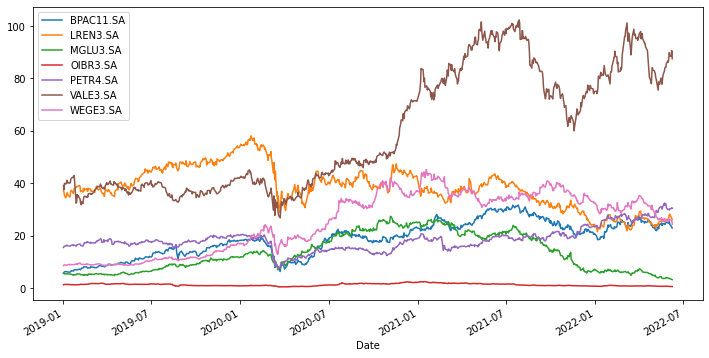

In [88]:
data.plot(figsize = (12,6))

Observe que é 'injusto' realizar uma comparação de um papel numa magnitude mais alta com outros que possuem o preço menor.

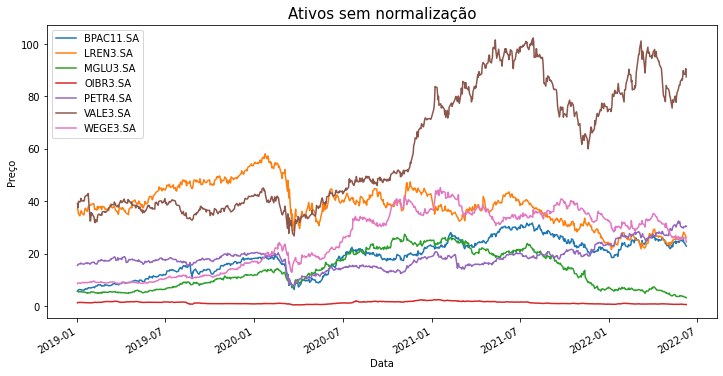

In [91]:
data.plot(figsize = (12,6))
plt.title('Ativos sem normalização', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

Introduzindo conceito da normalização

In [94]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773696,37.106571,5.641578,1.26,15.524000,39.107300,8.611481
2019-01-03,6.012528,36.637947,5.581216,1.41,15.904680,37.507492,8.807846
2019-01-04,6.225854,35.232075,5.411354,1.41,15.949845,39.949310,8.908427
2019-01-07,6.353386,34.422623,5.495375,1.42,16.201481,39.734982,8.769530
2019-01-08,6.235074,35.530296,5.451088,1.38,16.104700,40.117710,8.697690


In [100]:
#primeira linha 
data.iloc[0]

BPAC11.SA     5.773696
LREN3.SA     37.106571
MGLU3.SA      5.641578
OIBR3.SA      1.260000
PETR4.SA     15.524000
VALE3.SA     39.107300
WEGE3.SA      8.611481
Name: 2019-01-02 00:00:00, dtype: float64

In [101]:
data

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773696,37.106571,5.641578,1.26,15.524000,39.107300,8.611481
2019-01-03,6.012528,36.637947,5.581216,1.41,15.904680,37.507492,8.807846
2019-01-04,6.225854,35.232075,5.411354,1.41,15.949845,39.949310,8.908427
2019-01-07,6.353386,34.422623,5.495375,1.42,16.201481,39.734982,8.769530
2019-01-08,6.235074,35.530296,5.451088,1.38,16.104700,40.117710,8.697690
...,...,...,...,...,...,...,...
2022-06-02,25.330000,28.030001,3.800000,0.67,29.760000,89.900002,26.330000
2022-06-03,24.350000,28.190001,3.590000,0.65,30.280001,88.459999,25.920000
2022-06-06,23.620001,26.980000,3.400000,0.65,30.299999,88.550003,25.980000


In [102]:
normalizado = data/data.iloc[0]

In [103]:
normalizado.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.041365,0.987371,0.989301,1.119048,1.024522,0.959092,1.022803
2019-01-04,1.078313,0.949483,0.959191,1.119048,1.027431,1.021531,1.034483
2019-01-07,1.100402,0.927669,0.974085,1.126984,1.043641,1.016050,1.018353
2019-01-08,1.079910,0.957520,0.966235,1.095238,1.037407,1.025837,1.010011


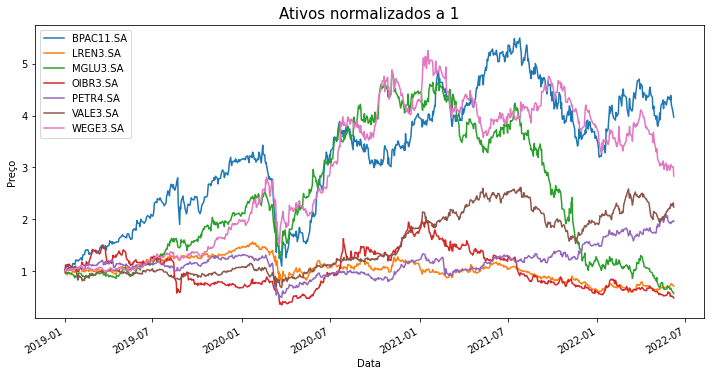

In [104]:
normalizado.plot(figsize = (12,6))
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

## 5.1. Plot de cotação com volume

Vamos extrair dados para um ativo só

In [109]:
lren = yf.download('LREN3.SA', start = '2017-01-01', end = '2022-06-09')

[*********************100%***********************]  1 of 1 completed


In [110]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484579,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021057,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862383,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696152,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492134,2139141


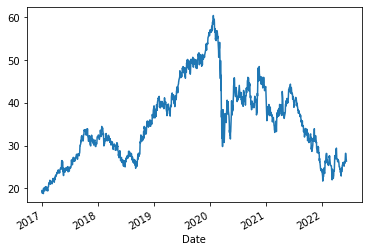

In [111]:
lren.Close.plot()

Text(0.5, 1.0, 'Fechamento | Volume | Cotação de LREN3')

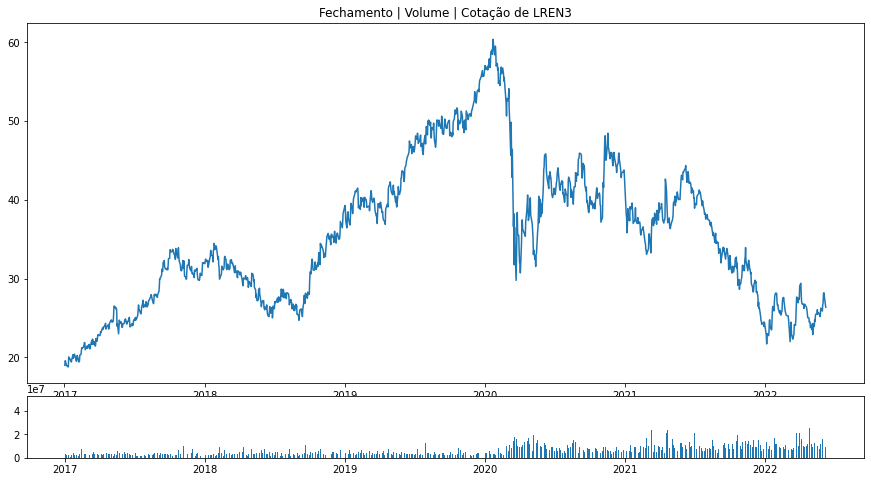

In [121]:
fig = plt.figure(figsize = (15,8))
#parametros figura, dividir linhas em colunas
gs = fig.add_gridspec(nrows = 6, ncols =1)
#eixo informação de preco
#linhas 0 ate 5 informação de cotação
ax1 = fig.add_subplot(gs[0:5, 0])
#eixo 2 informação de volume
ax2 = fig.add_subplot(gs[5, 0])

#determinar o quem vai conter no grafico
ax1.plot(lren.Close)
ax2.bar(lren.index, lren.Volume)
ax1.set_title('Fechamento | Volume | Cotação de LREN3')

**Exercício**

Criar uma função que recebe um papel determinado pelo usuário (sem .SA) e cria um plot de cotação e volume, com dimensões e datas (início e fim) também especificadas pelo usuário.

In [122]:
papel = 'PETR4'

In [123]:
f'{papel}'

'PETR4'

In [125]:
tamanho = (15,8)

In [126]:
def plota_cotacao_volume(papel, tamanho, inicio, fim):
    dados = yf.download(papel + '.SA', start = inicio, end = fim)
    fig = plt.figure(figsize = tamanho)
    gs = fig.add_gridspec(nrows = 6, ncols =1)
    ax1 = fig.add_subplot(gs[0:5, 0])
    ax2 = fig.add_subplot(gs[5, 0])

    ax1.plot(dados.Close)
    ax2.bar(dados.index, dados.Volume)
    # O título do gráfico precisa ser adaptável ao papel determinado pelos usuários
    ax1.set_title(f'Fechamento | Volume | Cotação de {papel}')

[*********************100%***********************]  1 of 1 completed


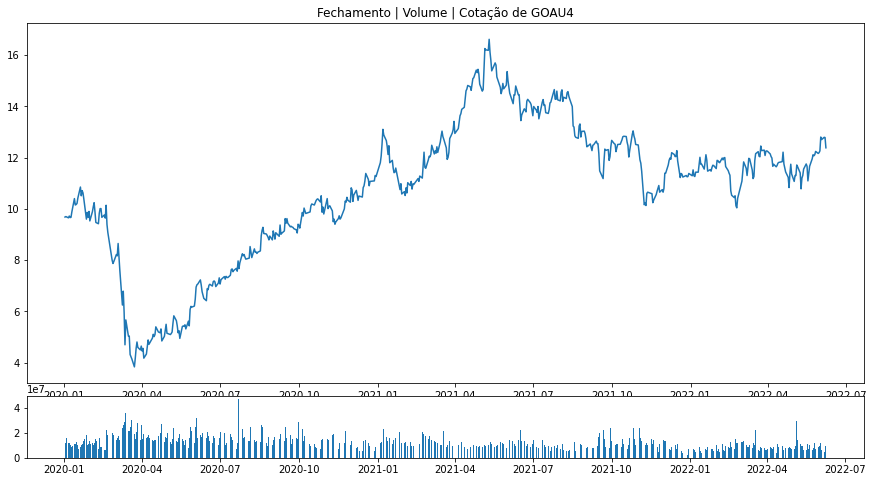

In [128]:
plota_cotacao_volume('GOAU4', tamanho, '2020-01-01', '2022-06-09')

# 6. Estudo de caso: matriz de correlação

## 6.1. Importando dados de FIIs, ETFs e BDRs

In [ ]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 
          'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [ ]:
inicio = '2017-01-01'

In [ ]:
precos_ativos = pd.DataFrame()

for i in ativos:
    precos_ativos[i] = yf.download(i, start = inicio)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
precos_ativos.head()

,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA,AAPL34.SA
Date,,,,,,,,
2017-01-02,138.095612,91.960693,NaN,107.094337,198.050491,54.000000,74.25,8.866890
2017-01-03,138.007675,92.158455,NaN,107.094337,197.463379,55.450001,74.25,8.773064
2017-01-04,139.688538,92.158455,NaN,107.094337,197.169830,56.990002,74.25,8.742568
2017-01-05,139.747177,90.971870,NaN,107.094337,196.876266,56.990002,74.25,8.791829
2017-01-06,140.675537,90.971870,NaN,107.094337,197.659073,56.500000,74.25,8.841088


## 6.2. Importando dados de índices, commodities e criptomoedas

### 6.2.1. Índices

In [ ]:
import investpy

In [ ]:
search_results = investpy.search_quotes(text = 'bvsp', products = ['indices'],
                      countries = ['brazil'], n_results = 10)

In [ ]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [ ]:
ibov = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [ ]:
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [ ]:
search_results = investpy.search_quotes(text = 'spx', products = ['indices'],
                      countries = ['united states'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 166, "name": "S&P 500", "symbol": "US500", "country": "united states", "tag": "/indices/us-spx-500", "pair_type": "indices", "exchange": "NYSE"}


In [ ]:
sp500 = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [ ]:
sp500.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [ ]:
ibov.rename(columns = {'Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.head()

,Open,High,Low,IBOV,Volume,Change Pct
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,833730,-1.06
2017-01-03,59631.0,61815.0,59631.0,61814.0,3431250,3.73
2017-01-04,61811.0,61940.0,61302.0,61589.0,2928720,-0.36
2017-01-05,61594.0,62409.0,61594.0,62071.0,3415520,0.78
2017-01-06,62072.0,62072.0,61396.0,61665.0,2448150,-0.65


In [ ]:
sp500.rename(columns = {'Close': 'S&P500'}, inplace = True)

In [ ]:
sp500.head()

,Open,High,Low,S&P500,Volume,Change Pct
Date,,,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83,0,0.85
2017-01-04,2261.60,2272.82,2261.60,2270.75,0,0.57
2017-01-05,2268.18,2271.50,2260.45,2269.00,0,-0.08
2017-01-06,2271.14,2282.10,2264.06,2276.98,0,0.35
2017-01-09,2273.59,2275.49,2268.90,2268.90,0,-0.35


In [ ]:
indices = pd.merge(ibov, sp500, how = 'inner', on = 'Date')

In [ ]:
indices = indices[['IBOV', 'S&P500']]

In [ ]:
indices

,IBOV,S&P500
Date,,
2017-01-03,61814.0,2257.83
2017-01-04,61589.0,2270.75
2017-01-05,62071.0,2269.00
2017-01-06,61665.0,2276.98
2017-01-09,61700.0,2268.90
...,...,...
2022-05-09,103250.0,3991.24
2022-05-10,103110.0,4001.05
2022-05-11,104397.0,3935.18


### 6.2.2. Commodities

In [ ]:
# Café
search_results = investpy.search_quotes(text = 'coffe', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": null, "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [ ]:
cafe = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

In [ ]:
cafe.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


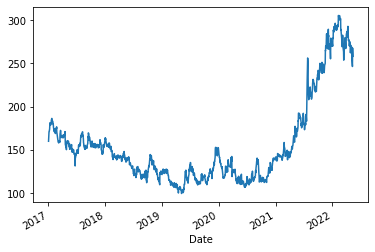

In [ ]:
cafe.Close.plot()

In [ ]:
cafe.rename(columns = {'Close': 'cafe'}, inplace = True)

In [ ]:
cafe.head()

,Open,High,Low,cafe,Volume,Change Pct
Date,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00
2017-01-03,163.70,165.35,160.50,163.30,576,2.16
2017-01-04,163.70,170.00,163.55,168.95,376,3.46
2017-01-05,170.90,172.95,169.00,170.90,278,1.15
2017-01-06,170.95,173.10,170.00,171.00,452,0.06


In [ ]:
# Soja
search_results = investpy.search_quotes(text = 'soy', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [ ]:
soja = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

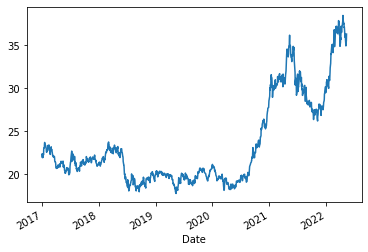

In [ ]:
soja.Close.plot()

In [ ]:
soja.rename(columns = {'Close': 'soja'}, inplace = True)

In [ ]:
# Etanol
search_results = investpy.search_quotes(text = 'ethanol', products = ['commodities'],
                      countries = ['brazil'], n_results = 10)

for search_result in search_results[:1]:
    print(search_result)

{"id_": 964525, "name": "Ethanol Futures", "symbol": "ETHc1", "country": null, "tag": "/commodities/ethanol-futures?cid=964525", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [ ]:
etanol = search_result.retrieve_historical_data(from_date = '01/01/2017', to_date = '15/05/2022')

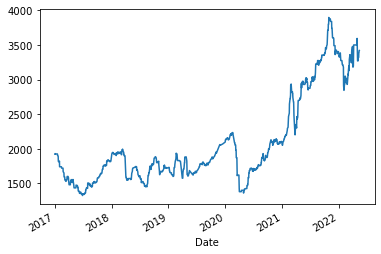

In [ ]:
etanol.Close.plot()

In [ ]:
etanol.rename(columns = {'Close': 'etanol'}, inplace = True)

In [ ]:
interm = pd.merge(cafe, soja, how = 'inner', on = 'Date')
commodities = pd.merge(interm, etanol, how = 'inner', on = 'Date')

In [ ]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [ ]:
from functools import reduce

In [ ]:
lista_dfs = [cafe, soja, etanol]

In [ ]:
commodities = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), lista_dfs)

In [ ]:
commodities.head()

,Open_x,High_x,Low_x,cafe,Volume_x,Change Pct_x,Open_y,High_y,Low_y,soja,Volume_y,Change Pct_y,Open,High,Low,etanol,Volume,Change Pct
Date,,,,,,,,,,,,,,,,,,
2017-01-02,160.15,162.00,160.15,159.85,6,0.00,22.33,22.33,22.33,22.33,0,0.00,1925.0,1925.0,1925.0,1925.0,10,6.50
2017-01-03,163.70,165.35,160.50,163.30,576,2.16,22.05,22.06,21.95,21.94,130,-1.75,1920.0,1935.0,1920.0,1930.0,152,0.26
2017-01-04,163.70,170.00,163.55,168.95,376,3.46,21.99,22.33,21.99,22.38,159,2.01,1930.0,1930.0,1920.0,1925.0,90,-0.26
2017-01-05,170.90,172.95,169.00,170.90,278,1.15,22.26,22.35,22.26,22.32,35,-0.27,1915.0,1925.0,1915.0,1925.0,146,0.00
2017-01-06,170.95,173.10,170.00,171.00,452,0.06,22.20,22.20,21.99,21.93,117,-1.75,1925.0,1925.0,1925.0,1925.0,150,0.00


In [ ]:
commodities = commodities[['cafe','soja','etanol']]

In [ ]:
commodities.head()

,cafe,soja,etanol
Date,,,
2017-01-02,159.85,22.33,1925.0
2017-01-03,163.30,21.94,1930.0
2017-01-04,168.95,22.38,1925.0
2017-01-05,170.90,22.32,1925.0
2017-01-06,171.00,21.93,1925.0


### Criptomoedas

In [ ]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

In [ ]:
bitcoin.rename(columns = {'Close': 'bitcoin'}, inplace = True)

In [ ]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum', 
                                              from_date = '01/01/2017', to_date = '15/05/2022')

ethereum.rename(columns = {'Close': 'ethereum'}, inplace = True)

In [ ]:
cripto = pd.merge(bitcoin, ethereum, how = 'inner', on = 'Date')

In [ ]:
cripto = cripto[['bitcoin', 'ethereum']]

In [ ]:
cripto.head()

,bitcoin,ethereum
Date,,
2017-01-01,995.4,8.20
2017-01-02,1017.0,8.37
2017-01-03,1033.3,9.74
2017-01-04,1135.4,11.00
2017-01-05,989.3,10.15


## 6.3. Dados do dólar

In [ ]:
dolar = yf.download('USDBRL=X', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3.2532,3.2797,3.2427,3.2532,3.2532,0
2017-01-03,3.2841,3.2897,3.2475,3.2840,3.2840,0
2017-01-04,3.2635,3.2643,3.2188,3.2635,3.2635,0
2017-01-05,3.2149,3.2276,3.1998,3.2141,3.2141,0
2017-01-06,3.1975,3.2118,3.1894,3.1977,3.1977,0


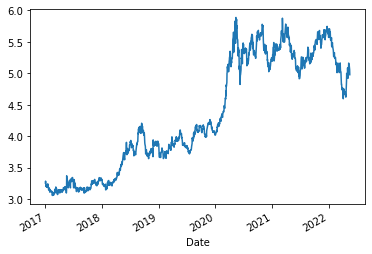

In [ ]:
dolar.Close.plot()

In [ ]:
dolar = pd.DataFrame(dolar.Close).rename(columns = {'Close': 'Dolar'})

In [ ]:
dolar.head()

,Dolar
Date,
2017-01-02,3.2532
2017-01-03,3.2840
2017-01-04,3.2635
2017-01-05,3.2141
2017-01-06,3.1977


## 6.4. Dados de ações

In [ ]:
data.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.773697,37.106575,5.641579,1.26,17.299591,39.107300,8.611479
2019-01-03,6.012528,36.637947,5.581217,1.41,17.723814,37.507492,8.807847
2019-01-04,6.225854,35.232075,5.411354,1.41,17.774143,39.949306,8.908426
2019-01-07,6.353385,34.422630,5.495374,1.42,18.054560,39.734982,8.769531
2019-01-08,6.235074,35.530289,5.451089,1.38,17.946711,40.117706,8.697689


## 6.5. Juntando tudo num dataframe só

In [ ]:
# Dados de ações
data.index = pd.to_datetime(data.index)
# Dados de FIIs, ETFs e BDRs
precos_ativos.index = pd.to_datetime(precos_ativos.index)
# Dados de índices
indices.index = pd.to_datetime(indices.index)
# Dados de commodities
commodities.index = pd.to_datetime(commodities.index)
# Dados de criptomoedas
cripto.index = pd.to_datetime(cripto.index)
# Cotação do dólar
dolar.index = pd.to_datetime(dolar.index)

In [ ]:
dfs = [data, precos_ativos, indices, commodities, cripto, dolar]

In [ ]:
df_final = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), dfs)

In [ ]:
df_final.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,5.773697,37.106575,5.641579,1.26,17.299591,39.107300,8.611479,146.885452,148.133942,NaN,...,74.25,14.618340,91012.0,2510.03,121.45,20.00,1730.0,3873.8,152.95,3.8799
2019-01-03,6.012528,36.637947,5.581217,1.41,17.723814,37.507492,8.807847,148.476120,148.133942,NaN,...,74.25,13.018816,91564.0,2447.89,124.95,20.12,1730.0,3780.1,146.94,3.7863
2019-01-04,6.225854,35.232075,5.411354,1.41,17.774143,39.949306,8.908426,148.594681,147.955002,NaN,...,74.25,13.226924,91841.0,2531.94,124.20,20.32,1730.0,3802.7,152.86,3.7551
2019-01-07,6.353385,34.422630,5.495374,1.42,18.054560,39.734982,8.769531,147.675858,143.163010,NaN,...,74.25,13.200305,91699.0,2549.69,124.35,20.38,1730.0,3985.9,149.96,3.6612
2019-01-08,6.235074,35.530289,5.451089,1.38,17.946711,40.117706,8.697689,147.893204,139.196198,NaN,...,74.25,13.597157,92032.0,2574.41,127.40,20.25,1690.0,3971.0,148.41,3.7341


In [ ]:
retornos = df_final.pct_change()

In [ ]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.041365,-0.012629,-0.010699,0.119048,0.024522,-0.040908,0.022803,0.010829,0.000000,NaN,...,0.0,-0.109419,0.006065,-0.024757,0.028818,0.006000,0.000000,-0.024188,-0.039294,-0.024124
2019-01-04,0.035480,-0.038372,-0.030435,0.000000,0.002840,0.065102,0.011419,0.000799,-0.001208,NaN,...,0.0,0.015985,0.003025,0.034336,-0.006002,0.009940,0.000000,0.005979,0.040289,-0.008240
2019-01-07,0.020484,-0.022975,0.015527,0.007092,0.015777,-0.005365,-0.015591,-0.006183,-0.032388,NaN,...,0.0,-0.002012,-0.001546,0.007010,0.001208,0.002953,0.000000,0.048176,-0.018972,-0.025006
2019-01-08,-0.018622,0.032178,-0.008059,-0.028169,-0.005974,0.009632,-0.008192,0.001472,-0.027708,NaN,...,0.0,0.030064,0.003631,0.009695,0.024528,-0.006379,-0.023121,-0.003738,-0.010336,0.019912


In [ ]:
retornos = retornos.dropna()

In [ ]:
retornos.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-17,0.004810,-0.004128,0.059020,0.020000,-0.025352,0.012296,-0.045339,0.006935,-0.003031,0.00036,...,0.0,0.008984,-0.012269,-0.005163,0.004751,-0.018163,0.016176,-0.142749,-0.214982,0.004506
2019-07-18,-0.009232,0.007254,0.010680,-0.032680,-0.006142,-0.001898,0.009765,0.000328,-0.006622,0.00000,...,0.0,-0.001703,0.008290,0.003582,0.012608,0.000514,0.001447,0.095462,0.067694,-0.001433
2019-07-19,-0.012597,-0.029836,-0.036235,-0.033784,-0.002545,0.002472,0.001758,-0.000656,0.000816,-0.00036,...,0.0,-0.007870,-0.012080,-0.006177,-0.013230,0.023112,0.008671,-0.007501,-0.022821,-0.011803
2019-07-22,-0.015205,0.008484,0.039067,-0.006993,0.001822,-0.005121,-0.008337,0.000000,0.006388,0.00045,...,0.0,0.020624,0.004804,0.002829,-0.022082,-0.017068,0.000000,-0.015040,-0.012813,0.007667
2019-07-23,-0.006389,-0.021031,-0.021629,0.035211,0.001091,-0.013155,-0.000885,-0.001312,-0.009049,0.00027,...,0.0,0.016839,-0.002357,0.006848,-0.028629,-0.001021,0.020057,-0.050305,-0.024854,-0.001628


## 6.6. Matriz de Correlação

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_final.corr()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,...,IVVB11.SA,AAPL34.SA,IBOV,S&P500,cafe,soja,etanol,bitcoin,ethereum,Dolar
BPAC11.SA,1.000000,-0.211798,0.486284,0.164509,0.463398,0.885591,0.824562,-0.366271,-0.079973,0.361448,...,0.776636,0.796806,0.848896,0.853332,0.565275,0.791279,0.742115,0.753564,0.693547,0.543609
LREN3.SA,-0.211798,1.000000,0.362951,0.361936,-0.497759,-0.475217,-0.303945,0.773224,0.433779,0.340631,...,-0.599031,-0.605578,0.036696,-0.541376,-0.745284,-0.571907,-0.594253,-0.554440,-0.655081,-0.391688
MGLU3.SA,0.486284,0.362951,1.000000,0.639027,-0.426465,0.257835,0.658536,0.360099,-0.066590,0.701904,...,0.363209,0.282220,0.366626,0.135727,-0.329215,0.105270,-0.073584,0.149316,-0.087130,0.555964
OIBR3.SA,0.164509,0.361936,0.639027,1.000000,-0.247665,0.112721,0.291446,0.281564,-0.091793,0.766526,...,-0.019253,-0.042935,0.357586,-0.079716,-0.444395,0.049006,-0.234620,-0.003867,-0.244845,0.023033
PETR4.SA,0.463398,-0.497759,-0.426465,-0.247665,1.000000,0.582706,0.215158,-0.559711,0.141412,-0.134371,...,0.352144,0.512064,0.549961,0.669724,0.819437,0.679241,0.721173,0.500195,0.636398,-0.059074
VALE3.SA,0.885591,-0.475217,0.257835,0.112721,0.582706,1.000000,0.718252,-0.610145,-0.273618,0.277540,...,0.789568,0.800383,0.804704,0.887688,0.700032,0.942443,0.808709,0.845993,0.794166,0.468313
WEGE3.SA,0.824562,-0.303945,0.658536,0.291446,0.215158,0.718252,1.000000,-0.246112,-0.201199,0.478685,...,0.881158,0.869199,0.577684,0.755081,0.432634,0.655310,0.598332,0.706052,0.587150,0.811704
KNRI11.SA,-0.366271,0.773224,0.360099,0.281564,-0.559711,-0.610145,-0.246112,1.000000,0.550592,0.300247,...,-0.546804,-0.535833,-0.233247,-0.634731,-0.776675,-0.630166,-0.702222,-0.621661,-0.752167,-0.192328
ONEF11.SA,-0.079973,0.433779,-0.066590,-0.091793,0.141412,-0.273618,-0.201199,0.550592,1.000000,0.014303,...,-0.412228,-0.281760,0.066218,-0.241396,-0.173968,-0.175493,-0.176077,-0.327541,-0.335054,-0.357616
HCTR11.SA,0.361448,0.340631,0.701904,0.766526,-0.134371,0.277540,0.478685,0.300247,0.014303,1.000000,...,0.118130,0.117996,0.520768,0.113384,-0.294890,0.210111,-0.054771,0.201785,-0.080501,0.181088


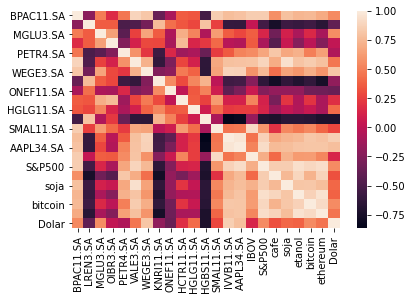

In [ ]:
sns.heatmap(df_final.corr())

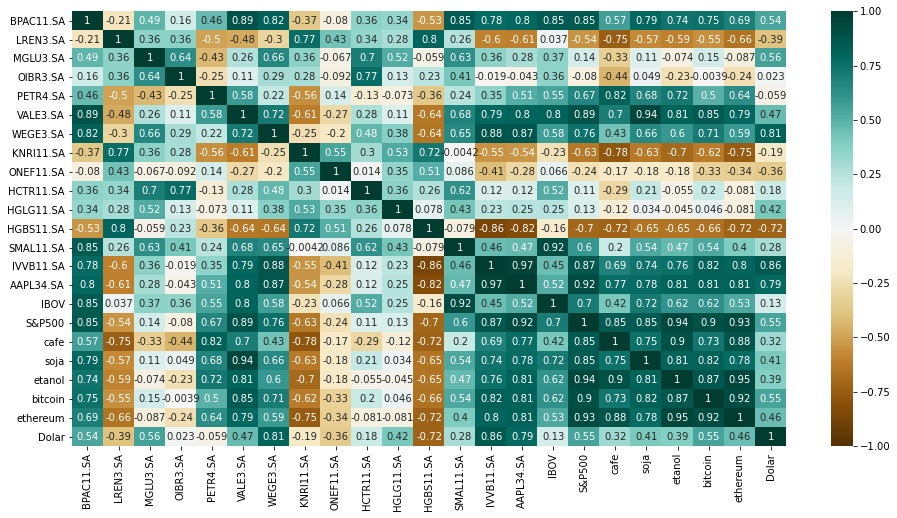

In [ ]:
plt.figure(figsize = (16,8))

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

# 7. Estudo de caso: comparação de carteira com o IBOV

Simplificação: vamos simular um único aporte feito no primeiro dia

## 7.1. Importando dados

In [ ]:
ativos = ['PETR4','VALE3', 'ABEV3', 'WEGE3', 'EMBR3', 'RADL3', 'CVCB3', 'CIEL3', 'OIBR3', 'KNRI11']

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
inicio = '2020-01-01'
fim = '2022-05-15'

In [ ]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
df.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,17.917433,7.810114,44.709999,20.200001,197.204117,0.86,22.807089,22.584095,42.689388,17.142605
2020-01-03,17.665468,7.709867,44.200001,20.410000,197.204117,0.86,22.621363,22.080606,42.375088,16.923700
2020-01-06,17.749458,7.518486,43.820000,20.379999,195.603561,0.92,22.888809,21.645958,42.123650,16.967484
2020-01-07,17.786785,7.299767,44.400002,20.500000,196.364319,0.94,22.799664,21.348980,42.430092,17.098829
2020-01-08,17.702797,7.135728,44.340000,20.330000,185.249344,0.92,22.658512,21.634159,42.437950,16.451843


## 7.2. Normalização dos ativos

In [ ]:
normalizado = df/df.iloc[0]

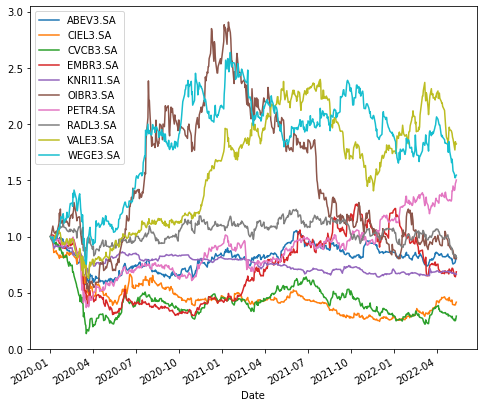

In [ ]:
normalizado.plot(figsize = (8,7))

## 7.3. Métricas básicas de carteira

Preços no dia do aporte

In [ ]:
primeiro = df.iloc[0]

In [ ]:
primeiro

ABEV3.SA      17.917433
CIEL3.SA       7.810114
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    197.204117
OIBR3.SA       0.860000
PETR4.SA      22.807089
RADL3.SA      22.584095
VALE3.SA      42.689388
WEGE3.SA      17.142605
Name: 2020-01-02 00:00:00, dtype: float64

Se investimos R$ 1000 em cada papel, quantos papéis precisamos comprar de cada?

In [ ]:
comprados = 1000/primeiro

In [ ]:
comprados

ABEV3.SA       55.811567
CIEL3.SA      128.039106
CVCB3.SA       22.366361
EMBR3.SA       49.504949
KNRI11.SA       5.070888
OIBR3.SA     1162.790678
PETR4.SA       43.846017
RADL3.SA       44.278949
VALE3.SA       23.425025
WEGE3.SA       58.334192
Name: 2020-01-02 00:00:00, dtype: float64

In [ ]:
# Número de papéis arredondados
round(comprados, 0)

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       44.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

In [ ]:
comprados = round(comprados, 0)

In [ ]:
comprados

ABEV3.SA       56.0
CIEL3.SA      128.0
CVCB3.SA       22.0
EMBR3.SA       50.0
KNRI11.SA       5.0
OIBR3.SA     1163.0
PETR4.SA       44.0
RADL3.SA       44.0
VALE3.SA       23.0
WEGE3.SA       58.0
Name: 2020-01-02 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [ ]:
PL = df*comprados

In [ ]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376236,999.694580,983.619980,1010.000038,986.020584,1000.180017,1003.511909,993.700180,981.855930,994.271080
2020-01-03,989.266220,986.862915,972.400017,1020.499992,986.020584,1000.180017,995.339958,971.546684,974.627018,981.574619
2020-01-06,993.969666,962.366272,964.039993,1018.999958,978.017807,1069.960019,1007.107605,952.422150,968.843941,984.114044
2020-01-07,996.059967,934.370239,976.800034,1025.000000,981.821594,1093.219997,1003.185196,939.355118,975.892113,991.732098
2020-01-08,991.356628,913.373169,975.480003,1016.499996,926.246719,1069.960019,996.974533,951.903000,976.072853,954.206909


In [ ]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2022-05-09,766.639977,391.170868,247.500000,657.499981,662.500000,802.469997,1415.039993,832.920013,1759.269951,1546.279991
2022-05-10,768.879974,394.980988,261.580008,652.500010,659.199982,837.360033,1427.359940,834.679970,1737.420021,1514.960049
2022-05-11,781.199989,391.679993,247.279995,648.500013,659.000015,814.099986,1477.079987,812.239960,1809.870056,1513.800022
2022-05-12,810.879974,407.040009,261.799992,667.999983,652.600021,814.099986,1488.520081,827.199966,1791.700035,1531.779991
2022-05-13,814.239998,416.000000,287.320009,692.999983,656.750031,802.469997,1507.880020,811.360023,1789.629944,1537.000000


In [ ]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2020-01-02,1003.376236,999.694580,983.619980,1010.000038,986.020584,1000.180017,1003.511909,993.700180,981.855930,994.271080,9956.230535
2020-01-03,989.266220,986.862915,972.400017,1020.499992,986.020584,1000.180017,995.339958,971.546684,974.627018,981.574619,9878.318025
2020-01-06,993.969666,962.366272,964.039993,1018.999958,978.017807,1069.960019,1007.107605,952.422150,968.843941,984.114044,9899.841455
2020-01-07,996.059967,934.370239,976.800034,1025.000000,981.821594,1093.219997,1003.185196,939.355118,975.892113,991.732098,9917.436355
2020-01-08,991.356628,913.373169,975.480003,1016.499996,926.246719,1069.960019,996.974533,951.903000,976.072853,954.206909,9772.073831


In [ ]:
PL.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2022-05-09,766.639977,391.170868,247.500000,657.499981,662.500000,802.469997,1415.039993,832.920013,1759.269951,1546.279991,9081.290771
2022-05-10,768.879974,394.980988,261.580008,652.500010,659.199982,837.360033,1427.359940,834.679970,1737.420021,1514.960049,9088.920973
2022-05-11,781.199989,391.679993,247.279995,648.500013,659.000015,814.099986,1477.079987,812.239960,1809.870056,1513.800022,9154.750016
2022-05-12,810.879974,407.040009,261.799992,667.999983,652.600021,814.099986,1488.520081,827.199966,1791.700035,1531.779991,9253.620038
2022-05-13,814.239998,416.000000,287.320009,692.999983,656.750031,802.469997,1507.880020,811.360023,1789.629944,1537.000000,9315.650005


Vamos obter agora os dados do IBOV para compará-lo com nossa carteira

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [ ]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [ ]:
ibov = ibov[['Ibov']]

In [ ]:
ibov

,Ibov
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2022-05-09,103250.0
2022-05-10,103110.0
2022-05-11,104397.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376236,999.694580,983.619980,1010.000038,986.020584,1000.180017,1003.511909,993.700180,981.855930,994.271080,9956.230535
2020-01-03,117707.0,989.266220,986.862915,972.400017,1020.499992,986.020584,1000.180017,995.339958,971.546684,974.627018,981.574619,9878.318025
2020-01-06,116878.0,993.969666,962.366272,964.039993,1018.999958,978.017807,1069.960019,1007.107605,952.422150,968.843941,984.114044,9899.841455
2020-01-07,116662.0,996.059967,934.370239,976.800034,1025.000000,981.821594,1093.219997,1003.185196,939.355118,975.892113,991.732098,9917.436355
2020-01-08,116247.0,991.356628,913.373169,975.480003,1016.499996,926.246719,1069.960019,996.974533,951.903000,976.072853,954.206909,9772.073831


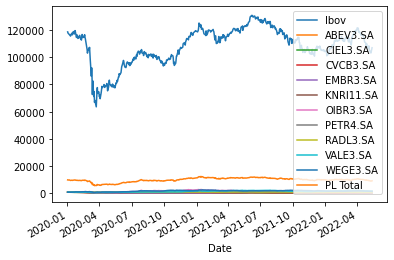

In [ ]:
novo_df.plot()

Vamos normalizar tudo para colocá-los na mesma base, ou seja, todos começam com 100

In [ ]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [ ]:
novo_normalizado

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593746,98.716441,98.859319,101.039599,100.000000,100.000000,99.185665,97.770606,99.263750,98.723038,99.217450
2020-01-06,98.570501,99.062508,96.266029,98.009395,100.891081,99.188376,106.976744,100.358311,95.846028,98.674756,98.978444,99.433630
2020-01-07,98.388335,99.270835,93.465570,99.306648,101.485145,99.574148,109.302323,99.967443,94.531040,99.392597,99.744639,99.610353
2020-01-08,98.038339,98.802084,91.365222,99.172447,100.643560,93.937868,106.976744,99.348550,95.793784,99.411006,95.970498,98.150337
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,87.077159,76.406033,39.129038,25.162157,65.099006,67.189267,80.232557,141.008789,83.820053,179.178013,155.518955,91.212138
2022-05-10,86.959088,76.629279,39.510166,26.593605,64.603959,66.854586,83.720932,142.236472,83.997164,176.952643,152.368914,91.288776
2022-05-11,88.044496,77.857135,39.179966,25.139790,64.207920,66.834306,81.395346,147.191077,81.738937,184.331530,152.252243,91.949960


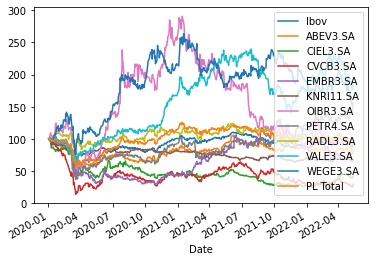

In [ ]:
novo_normalizado.plot()

In [ ]:
novo_normalizado.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406033,39.129038,25.162157,65.099006,67.189267,80.232557,141.008789,83.820053,179.178013,155.518955,91.212138
2022-05-10,86.959088,76.629279,39.510166,26.593605,64.603959,66.854586,83.720932,142.236472,83.997164,176.952643,152.368914,91.288776
2022-05-11,88.044496,77.857135,39.179966,25.139790,64.207920,66.834306,81.395346,147.191077,81.738937,184.331530,152.252243,91.949960
2022-05-12,89.133277,80.815146,40.716436,26.615969,66.138610,66.185233,81.395346,148.331083,83.244422,182.480951,154.060600,92.943007
2022-05-13,90.175672,81.150018,41.612709,29.210469,68.613857,66.606118,80.232557,150.260301,81.650385,182.270116,154.585609,93.566034


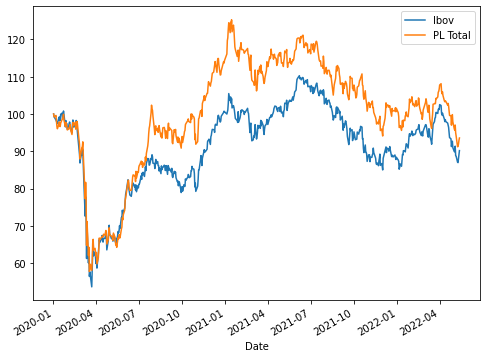

In [ ]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [ ]:
ativos

['PETR4.SA',
 'VALE3.SA',
 'ABEV3.SA',
 'WEGE3.SA',
 'EMBR3.SA',
 'RADL3.SA',
 'CVCB3.SA',
 'CIEL3.SA',
 'OIBR3.SA',
 'KNRI11.SA']

In [ ]:
alocacoes = {'PETR4.SA':2000,
 'VALE3.SA':2000,
 'ABEV3.SA':1000,
 'WEGE3.SA':1000,
 'EMBR3.SA':500,
 'RADL3.SA':500,
 'CVCB3.SA':500,
 'CIEL3.SA':500,
 'OIBR3.SA':500,
 'KNRI11.SA':1500}

In [ ]:
alocacoes

{'PETR4.SA': 2000,
 'VALE3.SA': 2000,
 'ABEV3.SA': 1000,
 'WEGE3.SA': 1000,
 'EMBR3.SA': 500,
 'RADL3.SA': 500,
 'CVCB3.SA': 500,
 'CIEL3.SA': 500,
 'OIBR3.SA': 500,
 'KNRI11.SA': 1500}

In [ ]:
alocacoes.keys()

dict_keys(['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'WEGE3.SA', 'EMBR3.SA', 'RADL3.SA', 'CVCB3.SA', 'CIEL3.SA', 'OIBR3.SA', 'KNRI11.SA'])

In [ ]:
alocacoes_df = pd.Series(data = alocacoes, index = list(alocacoes.keys()))

In [ ]:
alocacoes.values()

dict_values([2000, 2000, 1000, 1000, 500, 500, 500, 500, 500, 1500])

In [ ]:
sum(alocacoes.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [ ]:
primeiro = df.iloc[0]

In [ ]:
primeiro

ABEV3.SA      17.917433
CIEL3.SA       7.810114
CVCB3.SA      44.709999
EMBR3.SA      20.200001
KNRI11.SA    197.204117
OIBR3.SA       0.860000
PETR4.SA      22.807089
RADL3.SA      22.584095
VALE3.SA      42.689388
WEGE3.SA      17.142605
Name: 2020-01-02 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo (determinados no primeiro dia)

In [ ]:
compras = alocacoes_df/primeiro

In [ ]:
compras = round(compras, 0)

In [ ]:
compras

ABEV3.SA      56.0
CIEL3.SA      64.0
CVCB3.SA      11.0
EMBR3.SA      25.0
KNRI11.SA      8.0
OIBR3.SA     581.0
PETR4.SA      88.0
RADL3.SA      22.0
VALE3.SA      47.0
WEGE3.SA      58.0
dtype: float64

Criando um dataframe que contém a posição diária de cada ativo

In [ ]:
PL02 = df*compras

In [ ]:
PL02.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-02,1003.376236,499.847290,491.809990,505.000019,1577.632935,499.660008,2007.023819,496.850090,2006.401249,994.271080
2020-01-03,989.266220,493.431458,486.200008,510.249996,1577.632935,499.660008,1990.679916,485.773342,1991.629124,981.574619
2020-01-06,993.969666,481.183136,482.019997,509.499979,1564.828491,534.520010,2014.215210,476.211075,1979.811531,984.114044
2020-01-07,996.059967,467.185120,488.400017,512.500000,1570.914551,546.139999,2006.370392,469.677559,1994.214317,991.732098
2020-01-08,991.356628,456.686584,487.740002,508.249998,1481.994751,534.520010,1993.949066,475.951500,1994.583656,954.206909


In [ ]:
PL02['PL Total'] = PL02.sum(axis = 1)

In [ ]:
novo_df02 = pd.merge(ibov, PL02, how = 'inner', on = 'Date')

In [ ]:
novo_df02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,118573.0,1003.376236,499.847290,491.809990,505.000019,1577.632935,499.660008,2007.023819,496.850090,2006.401249,994.271080,10081.872716
2020-01-03,117707.0,989.266220,493.431458,486.200008,510.249996,1577.632935,499.660008,1990.679916,485.773342,1991.629124,981.574619,10006.097627
2020-01-06,116878.0,993.969666,481.183136,482.019997,509.499979,1564.828491,534.520010,2014.215210,476.211075,1979.811531,984.114044,10020.373138
2020-01-07,116662.0,996.059967,467.185120,488.400017,512.500000,1570.914551,546.139999,2006.370392,469.677559,1994.214317,991.732098,10043.194019
2020-01-08,116247.0,991.356628,456.686584,487.740002,508.249998,1481.994751,534.520010,1993.949066,475.951500,1994.583656,954.206909,9879.239105


In [ ]:
novo_normalizado_02 = (novo_df02/novo_df02.iloc[0])*100

In [ ]:
novo_normalizado_02.head()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.269648,98.593746,98.716441,98.859319,101.039599,100.000000,100.000000,99.185665,97.770606,99.263750,98.723038,99.248403
2020-01-06,98.570501,99.062508,96.266029,98.009395,100.891081,99.188376,106.976744,100.358311,95.846028,98.674756,98.978444,99.389998
2020-01-07,98.388335,99.270835,93.465570,99.306648,101.485145,99.574148,109.302323,99.967443,94.531040,99.392597,99.744639,99.616354
2020-01-08,98.038339,98.802084,91.365222,99.172447,100.643560,93.937868,106.976744,99.348550,95.793784,99.411006,95.970498,97.990119


In [ ]:
novo_normalizado_02.tail()

,Ibov,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2022-05-09,87.077159,76.406033,39.129038,25.162157,65.099006,67.189267,80.232557,141.008789,83.820053,179.178013,155.518955,111.719971
2022-05-10,86.959088,76.629279,39.510166,26.593605,64.603959,66.854586,83.720932,142.236472,83.997164,176.952643,152.368914,111.426227
2022-05-11,88.044496,77.857135,39.179966,25.139790,64.207920,66.834306,81.395346,147.191077,81.738937,184.331530,152.252243,113.654878
2022-05-12,89.133277,80.815146,40.716436,26.615969,66.138610,66.185233,81.395346,148.331083,83.244422,182.480951,154.060600,114.203785
2022-05-13,90.175672,81.150018,41.612709,29.210469,68.613857,66.606118,80.232557,150.260301,81.650385,182.270116,154.585609,114.855645


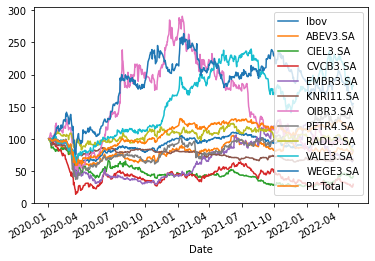

In [ ]:
novo_normalizado_02.plot()

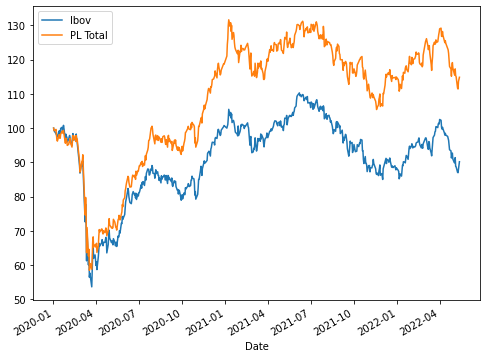

In [ ]:
novo_normalizado_02[['Ibov','PL Total']].plot(figsize = (8,6))

**Exercício**

Crie uma função que recebe um dicionário de alocações definido pelo usuário, e compara essa carteira com o Ibov. As datas de início e fim também devem ser definidas pelo usuário.

In [ ]:
alocacoes = {'PETR4.SA':2000,
 'VALE3.SA':2000,
 'ABEV3.SA':1000}

In [ ]:
ativos = ['PETR4.SA', 'VALE3.SA', 'ABEV3.SA']

In [ ]:
def compara_carteiras(ativos, dicionario, inicio, fim):
    df = yf.download(ativos, start = inicio, end = fim)['Adj Close']
    alocacoes_df = pd.Series(data = dicionario, index = list(dicionario.keys()))
    primeiro = df.iloc[0]
    compras = alocacoes_df/primeiro
    compras = round(compras, 0)
    PL00 = df*compras
    PL00['PL Total'] = PL00.sum(axis = 1)
    ibov = yf.download('^BVSP', start = inicio, end = fim)
    ibov.rename(columns = {'Close':'Ibov'}, inplace = True)
    novo_df00 = pd.merge(ibov, PL00, how = 'inner', on = 'Date')
    novo_normalizado_00 = (novo_df00/novo_df00.iloc[0])*100
    novo_normalizado_00[['Ibov','PL Total']].plot(figsize = (8,6))

In [ ]:
inicio

'2020-01-01'

In [ ]:
fim

'2022-05-15'

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


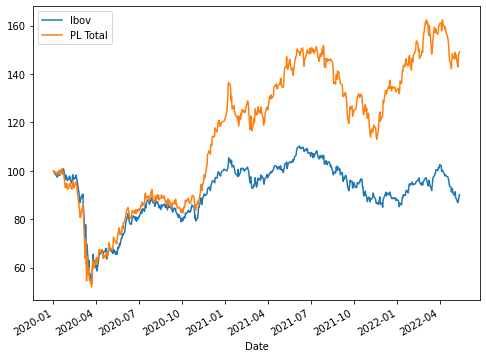

In [ ]:
compara_carteiras(ativos, alocacoes, inicio, fim)

In [ ]:
lista_ativos = ['PETR4.SA', 'MGLU3.SA', 'WEGE3.SA']

carteira = {'PETR4.SA':2000,
 'MGLU3.SA':3000,
 'WEGE3.SA':13000}

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


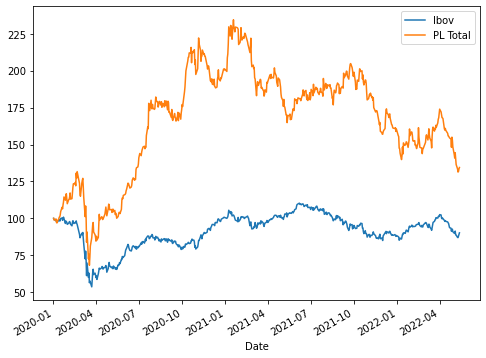

In [ ]:
compara_carteiras(lista_ativos, carteira, inicio, fim)